# DOE

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
import statsmodels.api as sms

/Users/bert/opt/miniconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Data

**45 lbs**

| Caffeine (mg) | 4 reps | 6 reps  | 8 reps |
|---------------|--------|---------|--------|
| 0             | 82     | 83      | 82     |
| 100           | 88     | 95      | 100    |
| 200           | 83     | 91      | 96     |

**90 lbs**

| Caffeine (mg) | 4 reps | 6 reps | 8 reps |
|---------------|--------|--------|--------|
| 0             | 88     | 98     | 95     |
| 100           | 98     | 96     | 97     |
| 200           | 101    | 99     | 106    |

**135 lbs**

| Caffeine (mg) | 4 reps | 6 reps | 8 reps |
|---------------|--------|--------|--------|
| 0             | 101    | 107    | 112    |
| 100           | 109    | 118    | 126    |
| 200           | 113    | 111    | 123    |

**Encoding:**
* Caffeine: -1 (0 mgs), 0 (100 mgs), 1 (200 mgs)

$ code = (mgs / 100) - 1 $

* Weight: -1 (45 lbs), 0 (90 lbs), 1 (135 lbs)

$ code = (lbs / 45) - 2 $

* Repititions: -1 (4 reps), 0 (6 reps), 1 (8 reps)

$ code = (reps / 2) - 3 $

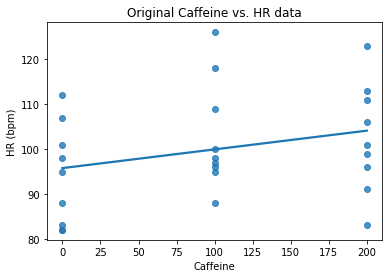

In [15]:
xA = pd.Series([-1, -1, -1, 0, 0, 0, 1, 1, 1, -1, -1, -1, 0, 0, 0, 1, 1, 1, -1, -1, -1, 0, 0, 0, 1, 1, 1], name='Caffeine')
xB = pd.Series([-1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], name='Weight')
xC = pd.Series([-1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1], name='Reps')
y = pd.Series([82, 83, 82, 88, 95, 100, 83, 91, 96, 88, 98, 95, 98, 96, 97, 101, 99, 106, 101, 107, 112, 109, 118, 126, 113, 111, 123], name='HR')

xAo = (xA + 1)*100
xBo = (xB + 2)*45
xCo = (xC + 3)*2

df_o = pd.concat([xAo, xBo, xCo, y], axis='columns')
sns.regplot(x='Caffeine',y='HR',data=df_o,ci=None)
plt.title('Original Caffeine vs. HR data')
plt.ylabel('HR (bpm)')
plt.show()

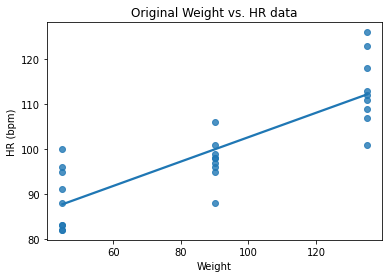

In [16]:
sns.regplot(x='Weight',y='HR',data=df_o,ci=None)
plt.title('Original Weight vs. HR data')
plt.ylabel('HR (bpm)')
plt.show()

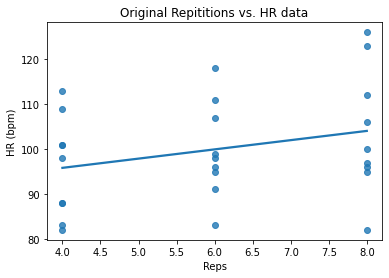

In [17]:
sns.regplot(x='Reps',y='HR',data=df_o,ci=None)
plt.title('Original Repititions vs. HR data')
plt.ylabel('HR (bpm)')
plt.show()

## Fitting Model

In [9]:
xA = pd.Series([-1, -1, -1, 0, 0, 0, 1, 1, 1, -1, -1, -1, 0, 0, 0, 1, 1, 1, -1, -1, -1, 0, 0, 0, 1, 1, 1], name='Caffeine')
xB = pd.Series([-1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], name='Weight')
xC = pd.Series([-1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1], name='Reps')
y = pd.Series([82, 83, 82, 88, 95, 100, 83, 91, 96, 88, 98, 95, 98, 96, 97, 101, 99, 106, 101, 107, 112, 109, 118, 126, 113, 111, 123], name='HR')

y_abs = y - 65 # absolute change in resting HR (65 bpm)
y_prop = (y_abs / y) * 100 # proportional change in percentage

df_a = pd.concat([xA, xB, xC, y_abs], axis='columns')
df_p = pd.concat([xA, xB, xC, y_prop], axis='columns')

model_a=ols('y_abs~xA+xB+xC+xA*xB+xA*xC+xB*xC+xA*xB*xC',data=df_a)
model_p=ols('y_prop~xA+xB+xC+xA*xB+xA*xC+xB*xC+xA*xB*xC',data=df_p)

results_a = model_a.fit()
results_p = model_p.fit()

print(results_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_abs   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     19.29
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           2.20e-07
Time:                        15:34:16   Log-Likelihood:                -76.936
No. Observations:                  27   AIC:                             169.9
Df Residuals:                      19   BIC:                             180.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.9259      0.959     36.412      0.0

In [10]:
print(results_p.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_prop   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     20.68
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           1.25e-07
Time:                        15:34:17   Log-Likelihood:                -64.459
No. Observations:                  27   AIC:                             144.9
Df Residuals:                      19   BIC:                             155.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.0390      0.604     56.333      0.0

The model for relative increase in heart rate (which we will analyze) is then:

$y = 34.03 + 2.83 xA + 7.96 xB + 2.57 xC - 0.43 xAxB + 0.55 xAxC + – 0.04 xBxC – 1.53 xAxBxC $

Where:
* y: % change in heart rate from resting rate, 15 seconds after exercise
* xA: caffeine encoded
* xB: weight encoded
* xC: repititions encoded

Analysing the significance of the model we note:
* $ R^2 $ = 0.884, the model is very strong in capturing 88.4% of the variance in y.
* None of the 95% confidence intervals of the main effects nor intercept cross zero - these are all significant factors.
* The test statistic and confidence intervals for all interaction effects indicate that these effects are not statistically significant.

## Visualizations

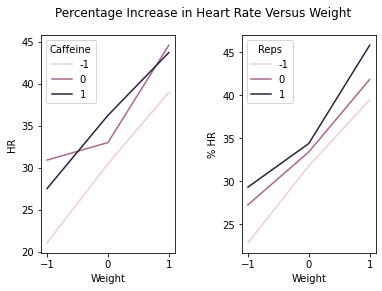

In [23]:
# Interaction Effects

fig, ax = fig,ax=plt.subplots(1,2,sharex=True)
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("Percentage Increase in Heart Rate Versus Weight")
plt.ylabel("% HR")
sns.lineplot(x="Weight",y="HR",hue="Caffeine",data=df_p,ax=ax[0], ci=None)
plt.ylabel("% HR")
sns.lineplot(x="Weight",y="HR",hue="Reps",data=df_p, ax=ax[1], ci=None)

plt.show()

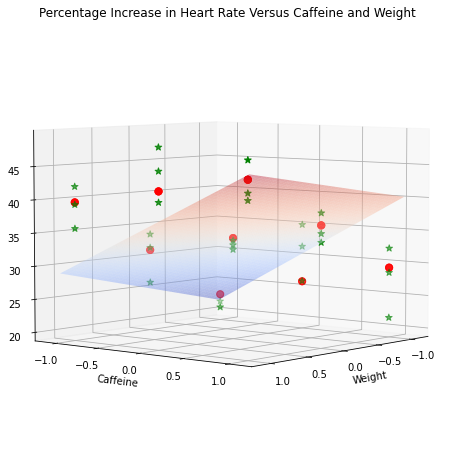

In [37]:
model_ab = ols('y_prop~xA+xB+xA*xB',data=df_p)
results_ab = model_ab.fit()

fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

X = df_p["Weight"]
Y = df_p["Caffeine"]
Z = df_p["HR"]

[x1,x2,x3]= model_ab.exog_names[1:]

x_surf=np.arange(-1.1,1.1,0.01)
y_surf=np.arange(-1.1,1.1,0.01)

xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_ab.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(X,Y,Z,marker='*',color="g", s=50, label="Raw Data")
ax.view_init(elev=5,azim=40)
ax.scatter(X.values,Y.values,results_ab.fittedvalues.values,label="Fited Values",color="r", s=50)

plt.xlabel("Weight")
plt.ylabel("Caffeine")
plt.title("Percentage Increase in Heart Rate Versus Caffeine and Weight")
plt.show()

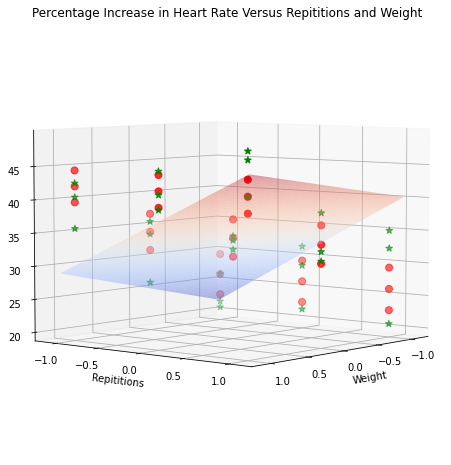

In [38]:
model_bc = ols('y_prop~xC+xB+xC*xB',data=df_p)
results_bc = model_ab.fit()

fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

X = df_p["Weight"]
Y = df_p["Reps"]
Z = df_p["HR"]

[x1,x2,x3]= model_ab.exog_names[1:]

x_surf=np.arange(-1.1,1.1,0.01)
y_surf=np.arange(-1.1,1.1,0.01)

xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_bc.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(X,Y,Z,marker='*',color="g", s=50, label="Raw Data")
ax.view_init(elev=5,azim=40)
ax.scatter(X.values,Y.values,results_bc.fittedvalues.values,label="Fited Values",color="r", s=50)

plt.xlabel("Weight")
plt.ylabel("Repititions")
plt.title("Percentage Increase in Heart Rate Versus Repititions and Weight")
plt.show()